In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [4]:
#checking for missing values in the training dataset
train_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
train_df.describe(include = 'all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='number_vmail_messages'>

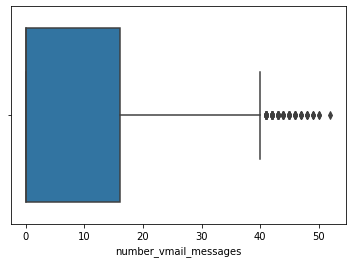

In [6]:
#checking for outliers in the number of people that record voicemails
sns.boxplot(train_df['number_vmail_messages'])

<AxesSubplot:xlabel='churn', ylabel='number_customer_service_calls'>

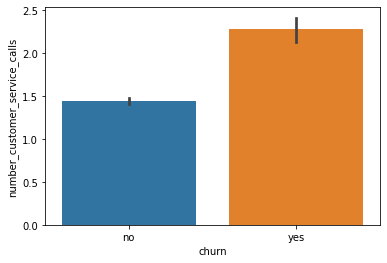

In [7]:
#seeing if the number of customer care calls affects the churn rate
sns.barplot(train_df['churn'],train_df['number_customer_service_calls'])

<AxesSubplot:xlabel='churn', ylabel='total_day_charge'>

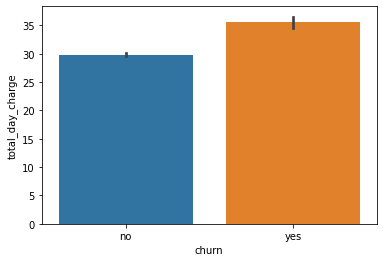

In [8]:
sns.barplot(train_df['churn'],train_df['total_day_charge'])

In [10]:
#checking the count of customers who stayed and left.
train_df['churn'].value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

In [11]:
train_df.duplicated().sum()

0

In [12]:
#replacing the categorical variable of both train and test dataset
train_df['churn'].replace({'yes':1,'no':0},inplace = True)

In [13]:
#replacing the other categorical columns in train and test set
other_columns = ['voice_mail_plan', 'international_plan']
for cols in other_columns:
    train_df[cols].replace({'yes':1,'no':0},inplace = True)

In [14]:
train_df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [16]:
#drop the unnecessary columns that wont be used 
columns_to_drop = ['area_code','state']
train_df.drop(columns_to_drop, axis = 1,inplace = True)

In [17]:
train_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


## FEATURE SCALING

In [19]:
#scaling the tenure,monthly charge and total charges data.
cols_to_scale =['account_length','number_vmail_messages','total_day_minutes','total_day_charge','total_eve_minutes','total_day_calls','total_eve_charge', 'total_eve_calls','total_night_minutes','total_night_calls','total_night_charge','total_intl_charge', 'total_intl_minutes','total_intl_calls','number_customer_service_calls']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [20]:
train_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.438017,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
1,0.561983,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
2,0.342975,1,0,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0
3,0.305785,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0
4,0.495868,0,1,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.338843,0,0,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,0.541362,0.515,0.30,0.514815,0.000000,0
4246,0.297521,0,0,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,0.471581,0.575,0.30,0.575926,0.333333,0
4247,0.305785,0,0,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,0.326956,0.345,0.35,0.344444,0.111111,0
4248,0.202479,0,1,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0


## BUILDING THE MODEL

In [21]:
#assigning the inputs and targets variable to x and y respectively.
x = train_df.drop('churn',axis ='columns')
y = train_df['churn']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [23]:
import tensorflow as tf
from tensorflow import keras

In [77]:
model = keras.Sequential([
    keras.layers.Dense(17,input_shape = (17,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
107/107 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.8318
Epoch 2/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8562
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8571
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8571
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8568
Epoch 6/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8571
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8571
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8574
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8571
Epoch 10/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8571

In [78]:
model.evaluate(x_test,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9106


[0.21943558752536774, 0.910588264465332]

In [79]:
yp = model.predict(x_test)
yp[:10]

array([[0.3488808 ],
       [0.05213559],
       [0.54356754],
       [0.02269781],
       [0.01271209],
       [0.3932326 ],
       [0.497969  ],
       [0.6121878 ],
       [0.10014743],
       [0.03737223]], dtype=float32)

In [80]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [82]:
y_test[:10]

3359    0
3330    0
3664    1
3714    0
815     0
325     0
231     0
1885    1
902     0
3634    0
Name: churn, dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       738
           1       0.76      0.46      0.58       112

    accuracy                           0.91       850
   macro avg       0.84      0.72      0.76       850
weighted avg       0.90      0.91      0.90       850



### One problem with this dataset is that it is imbalanced. There are more customers who are staying than leaving. To get a more robust prediction , we need to balance it by oversampling and undesampling the dataset to know which gives a better accuracy.

In [38]:
count_class_0,count_class_1 = train_df.churn.value_counts()

df_class_0 = train_df[train_df['churn']==0]
df_class_1 = train_df[train_df['churn']==1]

In [39]:
print(df_class_0.shape)
print(df_class_1.shape)

(3652, 18)
(598, 18)


In [40]:
#using method 1 OVERSAMPLING
df_class_1_over = df_class_1.sample(count_class_0,replace = True)
df_class_1_over.shape

(3652, 18)

In [42]:
train_df_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
train_df_over.shape

(7304, 18)

In [44]:
m = train_df_over.drop('churn', axis = 'columns')
n = train_df_over['churn']

In [45]:
m_train,m_test,n_train,n_test = train_test_split(m,n,test_size = 0.2,random_state = 15,stratify=n)

In [49]:
model = keras.Sequential([
    keras.layers.Dense(17,input_shape = (17,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

model.fit(m_train,n_train,epochs = 50)

Epoch 1/50
183/183 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5862
Epoch 2/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.6930
Epoch 3/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7419
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7647
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7770
Epoch 6/50
183/183 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7948
Epoch 7/50
183/183 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7992
Epoch 8/50
183/183 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8020
Epoch 9/50
183/183 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8112
Epoch 10/50
183/183 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8105

In [50]:
model.evaluate(m_test,n_test)

46/46 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8768


[0.3194810748100281, 0.8767967224121094]

In [52]:
np = model.predict(m_test)
n_pred = []
for element in np:
    if element > 0.5:
        n_pred.append(1)
    else:
        n_pred.append(0)

In [53]:
print(classification_report(n_test,n_pred))
#An improvemnt in the F1 score but this is still unbalanced

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       731
           1       0.87      0.88      0.88       730

    accuracy                           0.88      1461
   macro avg       0.88      0.88      0.88      1461
weighted avg       0.88      0.88      0.88      1461



#### We try undersmapling by reducing the number of 0's to match the number of 1's since 1 has a fewer number.

In [54]:
#Trying method 2 by undersampling

train_df_class_0_under = df_class_0.sample(count_class_1)
train_df_class_0_under.shape
#this method uses undersampling by reducing the number of 0 samples

(598, 18)

In [56]:
train_df_under = pd.concat([train_df_class_0_under,df_class_1],axis = 0)
train_df_under .shape

(1196, 18)

In [57]:
u = train_df_under.drop('churn', axis = 'columns')
v = train_df_under['churn']

In [65]:
u_train,u_test,v_train,v_test = train_test_split(u,v,test_size = 0.2,random_state = 15,stratify=v)

In [67]:
model = keras.Sequential([
    keras.layers.Dense(17,input_shape = (17,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

model.fit(u_train,v_train,epochs = 50)

Epoch 1/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5105
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5544
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5743
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6444
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6391
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6444
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6517
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6883
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7113
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6893
Epoch 11/50
30/30 [

In [68]:
model.evaluate(u_test,v_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7750


[0.5211806893348694, 0.7749999761581421]

In [74]:
np = model.predict(u_test)

In [75]:
v_pred = []
for element in np:
    if element > 0.5:
        v_pred.append(1)
    else:
        v_pred.append(0)

In [76]:
print(classification_report(v_test,v_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       120
           1       0.75      0.82      0.79       120

    accuracy                           0.78       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.78      0.78      0.77       240



### Overall we can see the oversampled data gave the most accurate precision and it is important to take into the overall balance of a dataset.

N.B this model can be improved if provided with more data to train.